### Credit to Animesh Tripathi, https://github.com/animesh1012/machineLearning/tree/main/Plant_Disease_Prediction

# Plants Prediction Training


## Dataset
From Khalid AlShamrani: https://pmuedusa-my.sharepoint.com/personal/201701476_pmu_edu_sa/_layouts/15/onedrive.aspx?id=%2Fpersonal%2F201701476%5Fpmu%5Fedu%5Fsa%2FDocuments%2FData%20Set

This the dataset with no modifications from an Iphone.


# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-12-08 12:45:17.745463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/mohammedalqadda/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = training_set.class_names
print(class_name)

Found 681 files belonging to 3 classes.
['Coleus_Blumei', 'Green_Pepper', 'Guldawari']


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 110 files belonging to 3 classes.
['Coleus_Blumei', 'Green_Pepper', 'Guldawari']


### Apply Augmentation to the Training Set

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

augmented_training_set = training_set.map(lambda x, y: (data_augmentation(x, training=True), y))

### Augmentation Visuals

2024-12-08 12:45:32.223469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


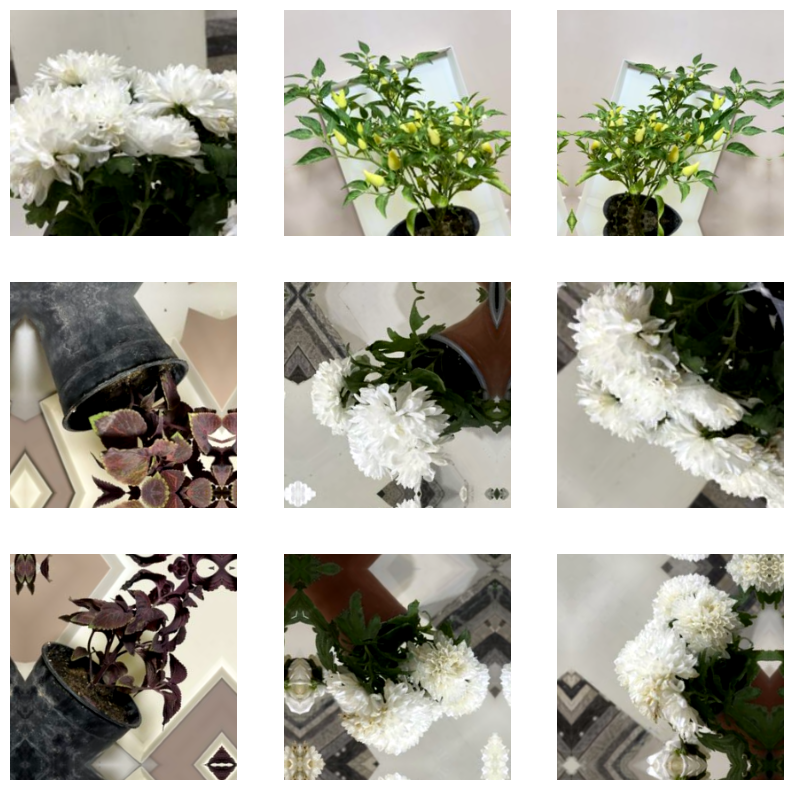

In [5]:
import matplotlib.pyplot as plt

for images, labels in training_set.take(1):
    augmented_images = data_augmentation(images, training=True)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.axis("off")

# Building Model

In [6]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


for layer in base_model.layers:
    layer.trainable = False


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 60,472,195 (230.68 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

training_history = model.fit(
    x=augmented_training_set,
    validation_data=validation_set,
    epochs=100,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.7028 - loss: 0.6583 - val_accuracy: 0.9909 - val_loss: 0.0414 - learning_rate: 1.0000e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0199 - learning_rate: 1.0000e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 220s 10s/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0165 - learning_rate: 1.0000e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 189s 9s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0152 - learning_rate: 1.0000e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 191s 9s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0145 - learning_rate: 1.0000e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0131 - learning_rate: 1.0000e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 184s 8s/step - accuracy:

# Evaluating Model

In [8]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 1.0000 - loss: 2.8213e-04
Training accuracy: 1.0


In [9]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 1.0000 - loss: 0.0103
Validation accuracy: 1.0


In [10]:
print(f"Training Loss: {train_loss}, Validation Loss: {val_loss}")

Training Loss: 0.00027676636818796396, Validation Loss: 0.011483857408165932


## Saving Model

In [12]:
model.save('trained_model.keras')


In [13]:
training_history.history #Return Dictionary of history

{'accuracy': [0.8634361028671265,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9985315799713135,
  1.0],
 'loss': [0.32582753896713257,
  0.009564796462655067,
  0.004367555491626263,
  0.0026597725227475166,
  0.0026147225871682167,
  0.0018345637945458293,
  0.0009606072562746704,
  0.0012012898223474622,
  0.002618452999740839,
  0.0016648118617013097],
 'val_accuracy': [0.9909090995788574,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9909090995788574],
 'val_loss': [0.041357073932886124,
  0.019932838156819344,
  0.016470255330204964,
  0.015221777372062206,
  0.014520534314215183,
  0.01311586145311594,
  0.011483856476843357,
  0.012800262309610844,
  0.011879349127411842,
  0.014698834158480167],
 'learning_rate': [9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-0

In [14]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [15]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


# Metrics For Model Evaluation

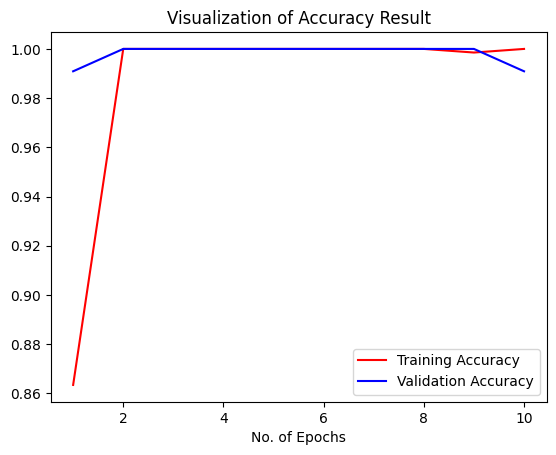

In [16]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [17]:
class_name = validation_set.class_names

In [18]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 48 files belonging to 3 classes.


In [20]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step


In [21]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-12-08 13:31:21.996686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
Y_true

<tf.Tensor: shape=(48,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])>

In [23]:
predicted_categories

<tf.Tensor: shape=(48,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])>

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [25]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

Coleus_Blumei       1.00      1.00      1.00        16
 Green_Pepper       1.00      0.94      0.97        18
    Guldawari       0.93      1.00      0.97        14

     accuracy                           0.98        48
    macro avg       0.98      0.98      0.98        48
 weighted avg       0.98      0.98      0.98        48



## Confusion Matrix Visualization

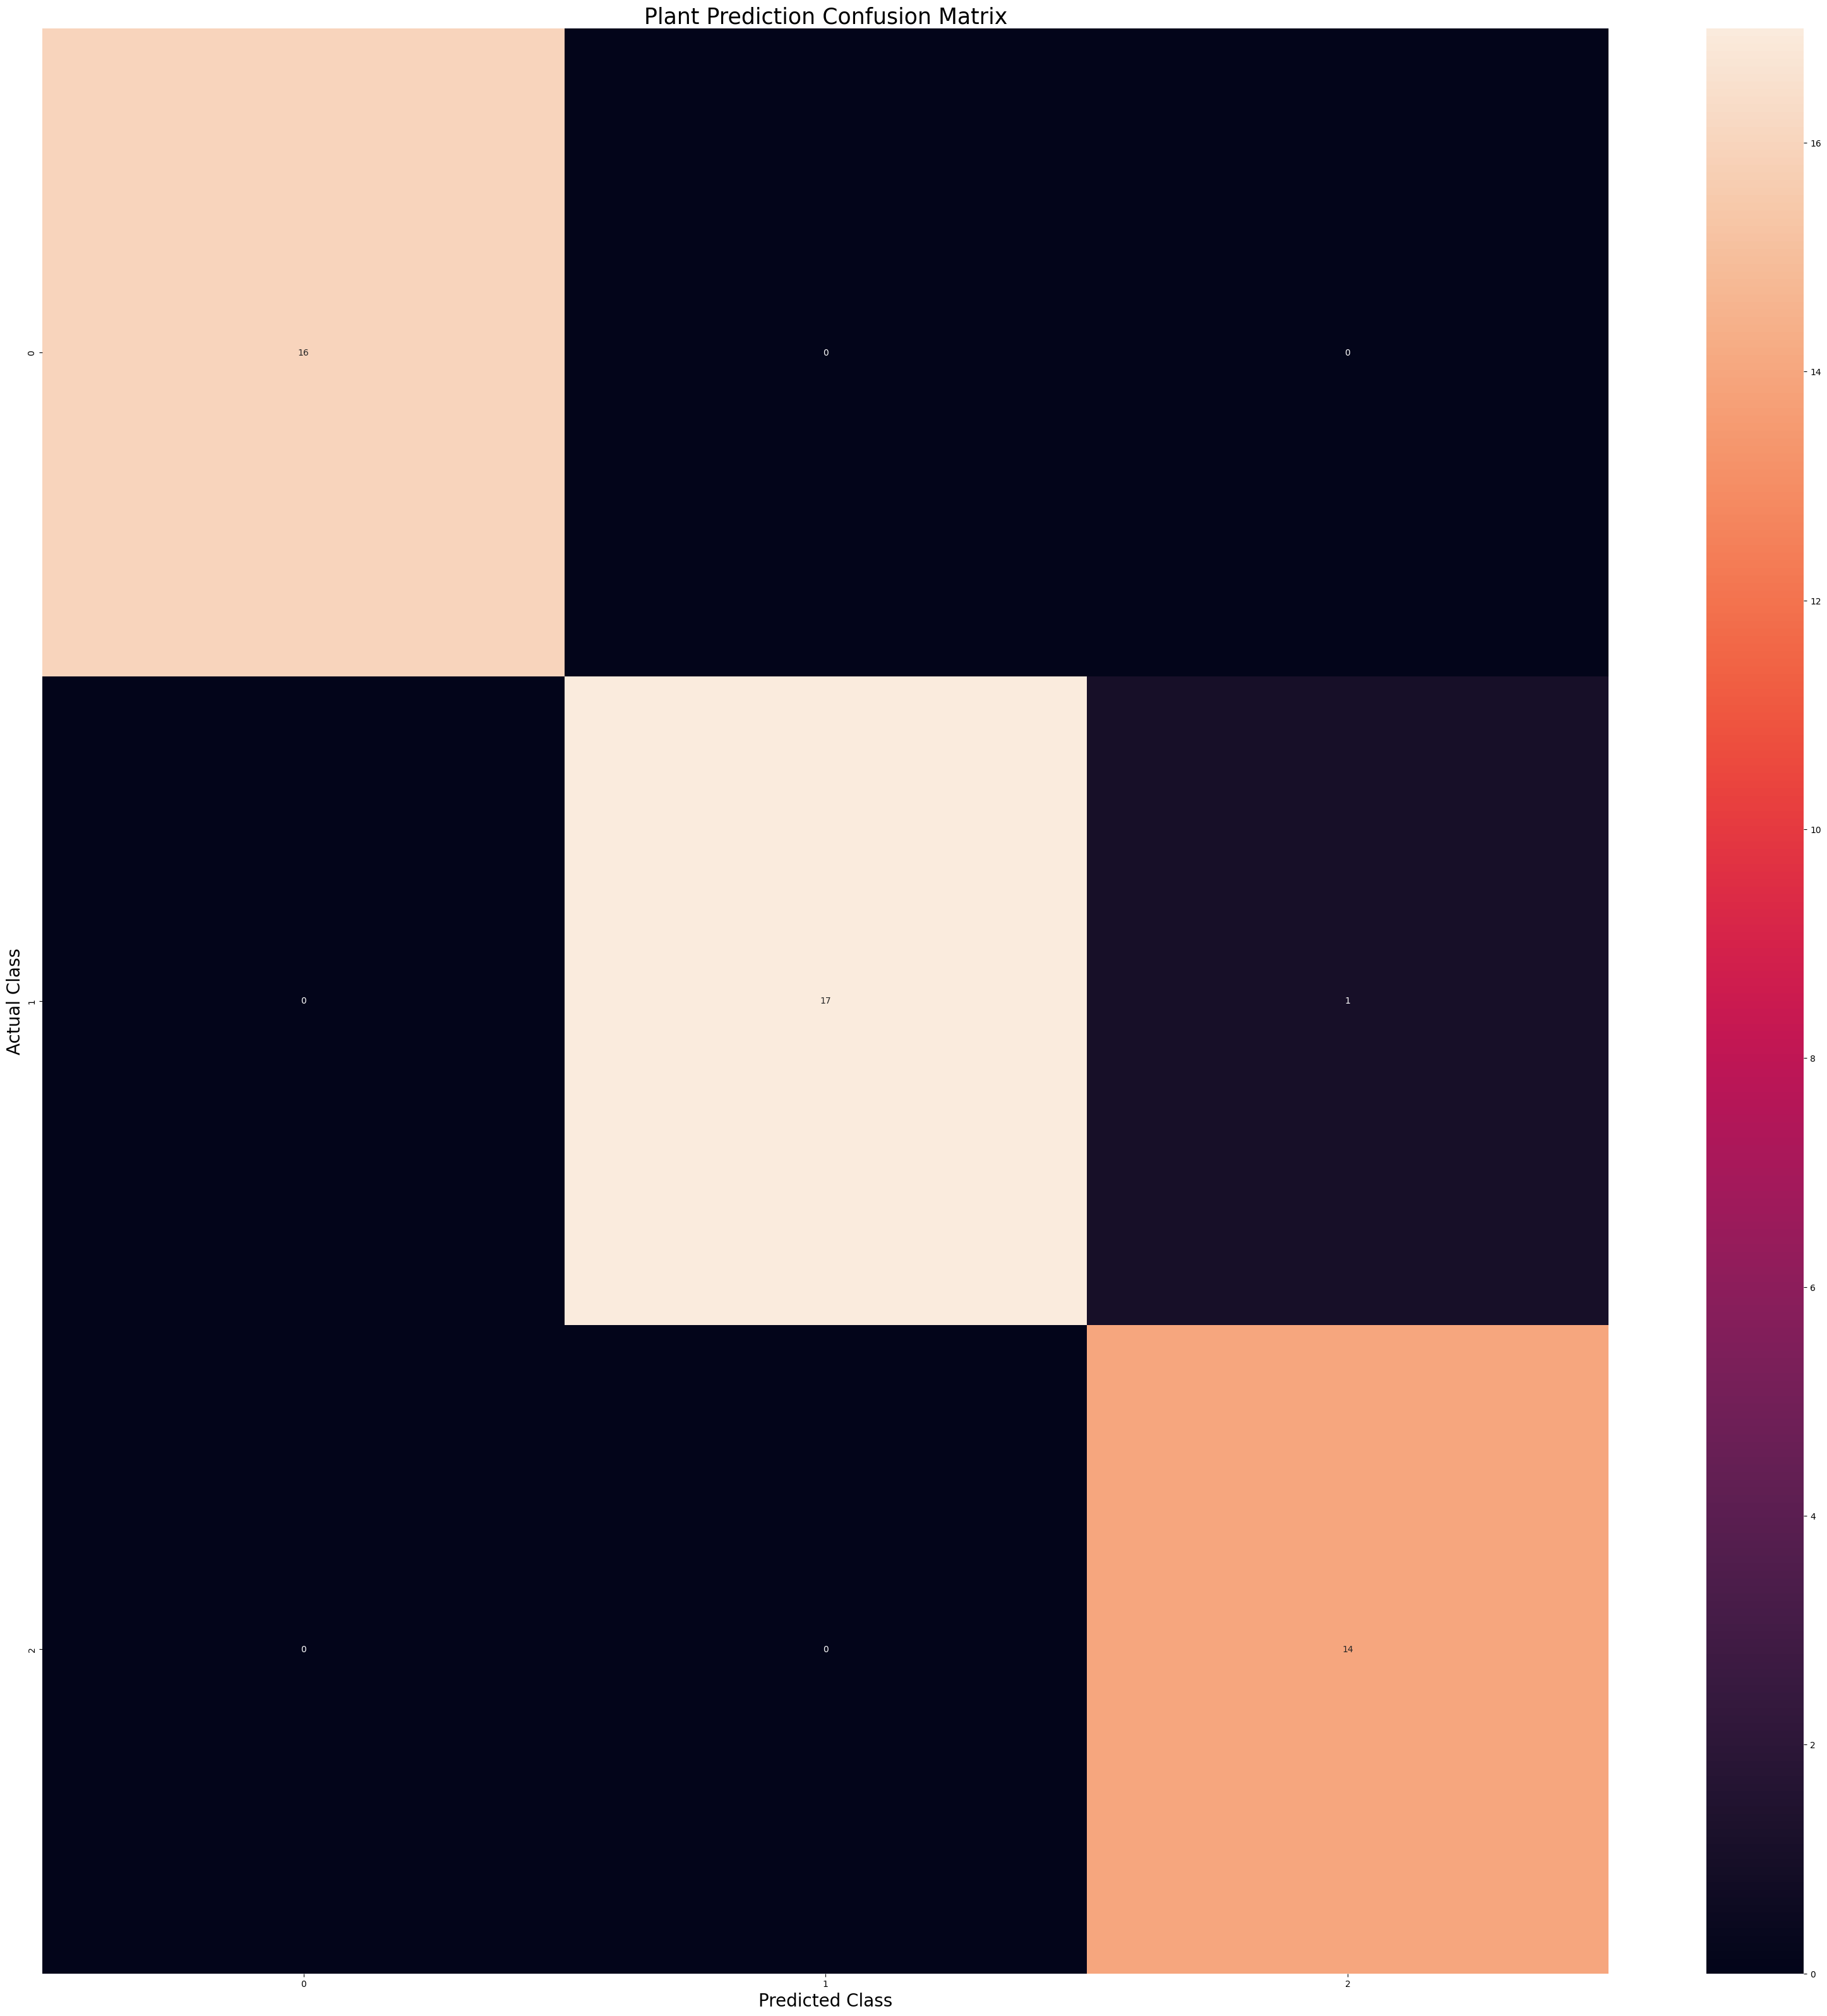

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Prediction Confusion Matrix',fontsize = 25)
plt.show()